In [1]:
import requests
r = requests.get('https://www.nytimes.com/interactive/2017/06/23/opinion/trumps-lies.html')

In [2]:
# print first 500 characters
print(r.text[0:500])

<!DOCTYPE html>
<!--[if (gt IE 9)|!(IE)]> <!--><html lang="en" class="no-js page-interactive section-opinion page-theme-standard tone-opinion page-interactive-default limit-small layout-xlarge app-interactive" itemid="https://www.nytimes.com/interactive/2017/06/23/opinion/trumps-lies.html" itemtype="http://schema.org/NewsArticle" itemscope xmlns:og="http://opengraphprotocol.org/schema/"><!--<![endif]-->
<!--[if IE 9]> <html lang="en" class="no-js ie9 lt-ie10 page-interactive section-opinion page


In [3]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(r.text, 'html.parser')

In [7]:
results = soup.find_all('span', attrs = {'class':'short-desc'})

In [8]:
len(results)

180

In [20]:
results[0]

<span class="short-desc"><strong>Jan. 21 </strong>“I wasn't a fan of Iraq. I didn't want to go into Iraq.” <span class="short-truth"><a href="https://www.buzzfeed.com/andrewkaczynski/in-2002-donald-trump-said-he-supported-invading-iraq-on-the" target="_blank">(He was for an invasion before he was against it.)</a></span></span>

## Extract Date

In [16]:
first_result = results[0]
first_result.find('strong') 

<strong>Jan. 21 </strong>

In [17]:
first_result.find('strong').text

'Jan. 21\xa0'

In [18]:
first_result.find('strong').text[0:-1]

'Jan. 21'

In [19]:
first_result.find('strong').text[0:-1] + ', 2017'

'Jan. 21, 2017'

## Extract the Lie

In [21]:
first_result

<span class="short-desc"><strong>Jan. 21 </strong>“I wasn't a fan of Iraq. I didn't want to go into Iraq.” <span class="short-truth"><a href="https://www.buzzfeed.com/andrewkaczynski/in-2002-donald-trump-said-he-supported-invading-iraq-on-the" target="_blank">(He was for an invasion before he was against it.)</a></span></span>

In [29]:
first_result.contents[1]

"“I wasn't a fan of Iraq. I didn't want to go into Iraq.” "

In [30]:
first_result.contents[1][1:-2]

"I wasn't a fan of Iraq. I didn't want to go into Iraq."

##  Extracting the explanation

In [31]:
first_result.contents[2]

<span class="short-truth"><a href="https://www.buzzfeed.com/andrewkaczynski/in-2002-donald-trump-said-he-supported-invading-iraq-on-the" target="_blank">(He was for an invasion before he was against it.)</a></span>

In [34]:
first_result.find('a').text[1:-1]

'He was for an invasion before he was against it.'


## Extracting the URL

In [44]:
first_result

<span class="short-desc"><strong>Jan. 21 </strong>“I wasn't a fan of Iraq. I didn't want to go into Iraq.” <span class="short-truth"><a href="https://www.buzzfeed.com/andrewkaczynski/in-2002-donald-trump-said-he-supported-invading-iraq-on-the" target="_blank">(He was for an invasion before he was against it.)</a></span></span>

In [35]:
first_result.find('a')

<a href="https://www.buzzfeed.com/andrewkaczynski/in-2002-donald-trump-said-he-supported-invading-iraq-on-the" target="_blank">(He was for an invasion before he was against it.)</a>

In [43]:
first_result.find('a')['href']

'https://www.buzzfeed.com/andrewkaczynski/in-2002-donald-trump-said-he-supported-invading-iraq-on-the'

## Building the Dataset

In [60]:
first_result.find("a")['href']

'https://www.buzzfeed.com/andrewkaczynski/in-2002-donald-trump-said-he-supported-invading-iraq-on-the'

In [61]:
records =[]
for result in results:
    date = result.find('strong').text[0:-1] + ', 2017'
    lie = result.contents[1][1:-2]
    explanation = result.contents[2].text[1:-1]
    url = result.find("a")['href']
    records.append((date, lie, explanation, url))

In [62]:
len(records)

180

In [73]:
import pandas as pd
import module as md

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
data = pd.DataFrame(records, columns = ('Date', 'Lie', 'Explanation', 'URL'))

In [72]:
data.Date = pd.to_datetime(data.Date)

In [74]:
md.summary(data)

There are 4 columns and 180 rows in the dataset

----------

Null values
There are no null values

----------

The columns and their datatypes are
Date           datetime64[ns]
Lie                    object
Explanation            object
URL                    object
dtype: object


First 5 data points


,Date,Lie,Explanation,URL
0,2017-01-21,I wasn't a fan of Iraq. I didn't want to go in...,He was for an invasion before he was against it.,https://www.buzzfeed.com/andrewkaczynski/in-20...
1,2017-01-21,A reporter for Time magazine — and I have been...,Trump was on the cover 11 times and Nixon appe...,http://nation.time.com/2013/11/06/10-things-yo...
2,2017-01-23,Between 3 million and 5 million illegal votes ...,There's no evidence of illegal voting.,https://www.nytimes.com/2017/01/23/us/politics...
3,2017-01-25,"Now, the audience was the biggest ever. But th...",Official aerial photos show Obama's 2009 inaug...,https://www.nytimes.com/2017/01/21/us/politics...
4,2017-01-25,Take a look at the Pew reports (which show vot...,The report never mentioned voter fraud.,https://www.nytimes.com/2017/01/24/us/politics...


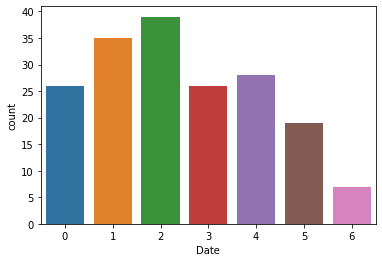

In [82]:
sns.countplot(data.Date.dt.weekday)